In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from magnetofft import *

In [6]:
def plot_ax_freqmap(ax,freq,sd,label=None):
    N = len(freq)
    ax.plot(freq[:N//2],sd[:N//2],label=label)
    return None

def print_dc(dset):
    dc_x = np.mean(dset['x'])
    dc_y = np.mean(dset['y'])
    dc_z = np.mean(dset['z'])
    std_x = np.std(dset['x'])
    std_y = np.std(dset['y'])
    std_z = np.std(dset['z'])
    
    depth = 16 # bit
    scope = 10.*1000./143. # V
    sample_err = scope /2**depth
    Ns = len(dset['x'])
    
    print('Ns:',Ns)
    print(' x:',dc_x,'\n y:',dc_y,'\n z:',dc_z)
    print('sx:',std_x,'\nsy:',std_y,'\nsz:',std_z)
    print('ex:',std_x/np.sqrt(Ns),'\ney:',std_y/np.sqrt(Ns),'\nez:',std_z/np.sqrt(Ns))
    print('sys err 16 bit daq:',sample_err)
    print('dc component amplitude:', np.sqrt(dc_x**2+dc_y**2+dc_z**2))


In [16]:
import os
FIGOUTPS = '/home/gw-group/gdzhao/20250605_Bedretto_pspsd/power_spectrum/'
FIGOUTPSD = '/home/gw-group/gdzhao/20250605_Bedretto_pspsd/power_specral_density/'
if not os.path.exists(FIGOUTPS):
    os.mkdir(FIGOUTPS)
if not os.path.exists(FIGOUTPSD):
    os.mkdir(FIGOUTPSD)

# 0605 Bedretto lab Test

Saved files in path `/home/gw-group/20250605_Bedretto/`

In [3]:
import os
dir = '/home/gw-group/20250605_Bedretto/'
filelist = os.listdir(dir)

In [46]:
print(filelist)

['mag_2025_06_05_12_43.csv', 'mag_2025_06_05_11_04.csv', 'mag_2025_06_05_12_49.csv', '.log.txt.swp', 'mag_2025_06_05_10_13.csv', 'mag_2025_06_05_10_47.csv', 'mag_2025_06_05_09_44.csv', 'mag_2025_06_05_09_27.csv', 'log.txt', 'mag_2025_06_05_12_45.csv', 'mag_2025_06_05_09_10.csv', 'mag_2025_06_05_12_47.csv', 'mag_2025_06_04_15_02.csv', 'mag_2025_06_05_10_30.csv', 'mag_2025_06_04_15_04.csv']


## 100s test1

In [4]:
fs = 1000.
dset = load_csv(dir+'mag_2025_06_04_15_02.csv')

### DC component

In [7]:
print_dc(dset)

Ns: 99972
 x: 43.531115490063556 
 y: -20.490241617992154 
 z: 19.61589401385626
sx: 0.02902398309831622 
sy: 0.012360399674746603 
sz: 0.00859640064478703
ex: 9.179474552499797e-05 
ey: 3.909248909383686e-05 
ez: 2.7188012305069616e-05
sys err 16 bit daq: 0.0010670481861888112
dc component amplitude: 51.95759150822708


### Comments on DC
Using [NCEI magnetic field model](https://www.ngdc.noaa.gov/geomag/calculators/magcalc.shtml#igrfwmm). We get field value $48.0417 \pm 0.138 \mu T$ at 1.5km above sea level.

Here we get $51.958\pm0.001 \mu T$, which is not matching.

In [10]:
freq, asd_x = fft_asd(dset['x'],fs)
_, asd_y = fft_asd(dset['y'],fs)
_, asd_z = fft_asd(dset['z'],fs)

In [11]:
def plot_ax_freqmap(ax,freq,sd,label=None):
    N = len(freq)
    ax.plot(freq[:N//2],sd[:N//2],label=label)
    return None

/home/gw-group/gdzhao/.env/lib/python3.11/site-packages/matplotlib/scale.py:270: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


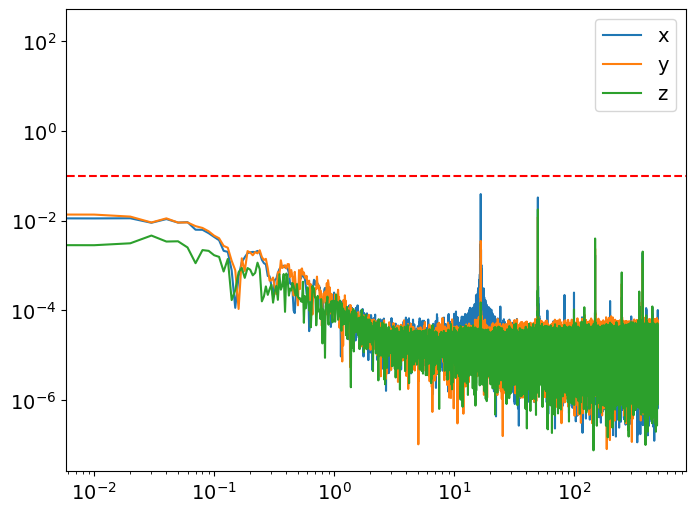

In [12]:
fig,ax = plt.subplots(figsize = (8,6))
plot_ax_freqmap(ax,freq,asd_x,label = 'x')
plot_ax_freqmap(ax,freq,asd_y,label = 'y')
plot_ax_freqmap(ax,freq,asd_z,label = 'z')
ax.set_yscale('log')
ax.set_xscale('log')
ax.axhline(0.1,0.001,500,linestyle='--',c='r')
ax.legend()

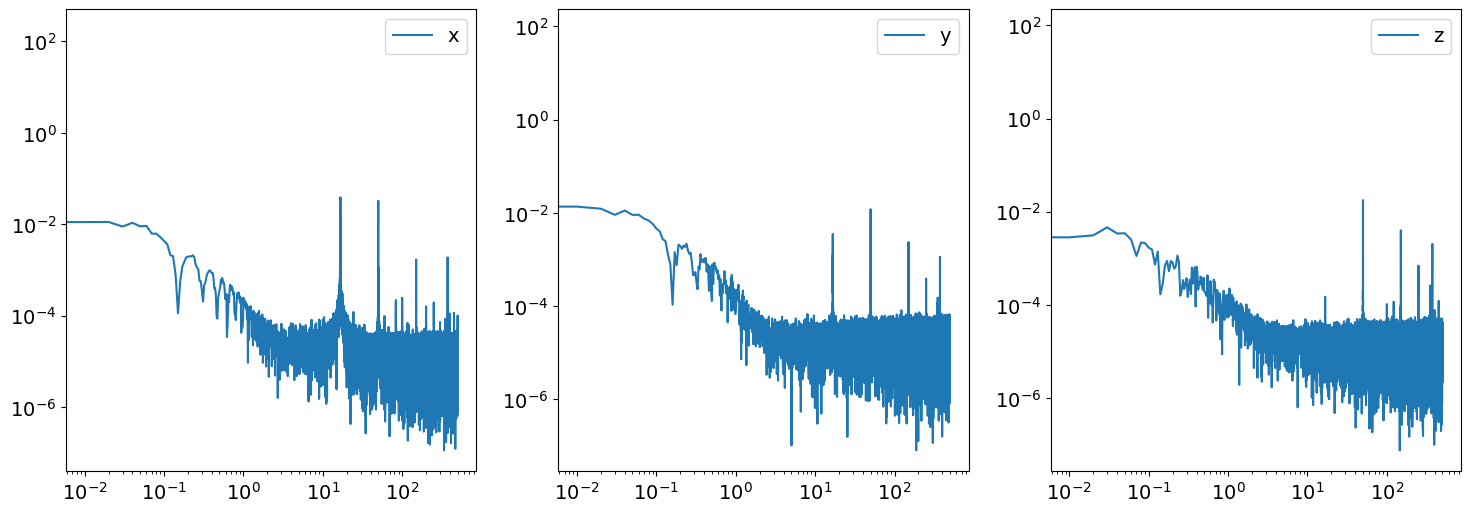

In [13]:
fig,ax = plt.subplots(1,3,figsize = (18,6))
plot_ax_freqmap(ax[0],freq,asd_x,label = 'x')
plot_ax_freqmap(ax[1],freq,asd_y,label = 'y')
plot_ax_freqmap(ax[2],freq,asd_z,label = 'z')
for i in range(3):
    ax[i].set_yscale('log')
    ax[i].set_xscale('log')
    ax[i].legend()

plot complete 2025_06_04_15_02.


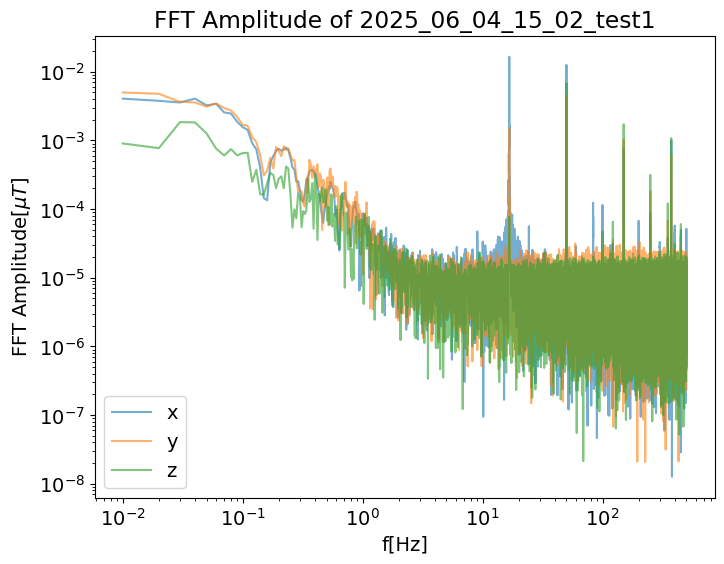

In [17]:
samplename = '2025_06_04_15_02_test1'
fig,ax = plot_sample_ps(dir+'mag_2025_06_04_15_02.csv',fs=fs)
ax.legend(loc='lower left')
ax.set_title('FFT Amplitude of '+ samplename)
fig.savefig(FIGOUTPS+samplename+'_ps.png',dpi=200)

plot sample /home/gw-group/20250605_Bedretto/mag_2025_06_04_15_02.csv:
! Warning, no Lbin, taken default
plot complete /home/gw-group/20250605_Bedretto/mag_2025_06_04_15_02.csv.


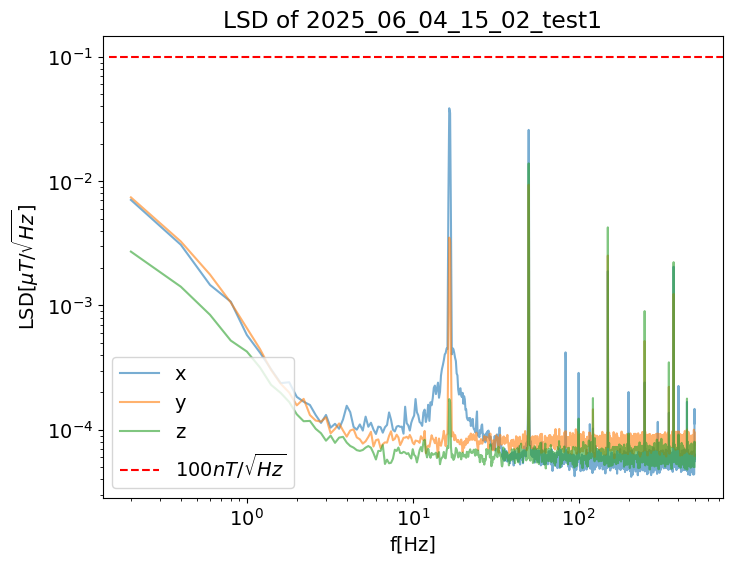

In [22]:
samplename = '2025_06_04_15_02_test1'
fig,ax = plot_sample_psd(dir+'mag_2025_06_04_15_02.csv',fs=fs)
ax.set_title('LSD of '+ samplename)
ax.axhline(0.1,1e-2,0.5e3,label = r'$100nT/\sqrt{Hz}$',linestyle='--',c='r')
ax.legend(loc='lower left')
fig.savefig(FIGOUTPSD+samplename+'_psd.png',dpi=200)

## 1000s test2

In [31]:
fs = 1000.
dset = load_csv(dir+'mag_2025_06_04_15_04.csv')

In [32]:
print_dc(dset)

Ns: 999877
 x: 43.80985520623193 
 y: -17.716153501076484 
 z: 21.446050418204898
sx: 0.048582890698963814 
sy: 0.21297003734703182 
sz: 0.2544300041747615
ex: 4.858587882239901e-05 
ey: 0.0002129831362127114 
ez: 0.00025444565306364305
sys err 16 bit daq: 0.0010670481861888112
dc component amplitude: 51.89507285479902


In [33]:
freq, asd_x = fft_asd(dset['x'],fs)
_, asd_y = fft_asd(dset['y'],fs)
_, asd_z = fft_asd(dset['z'],fs)

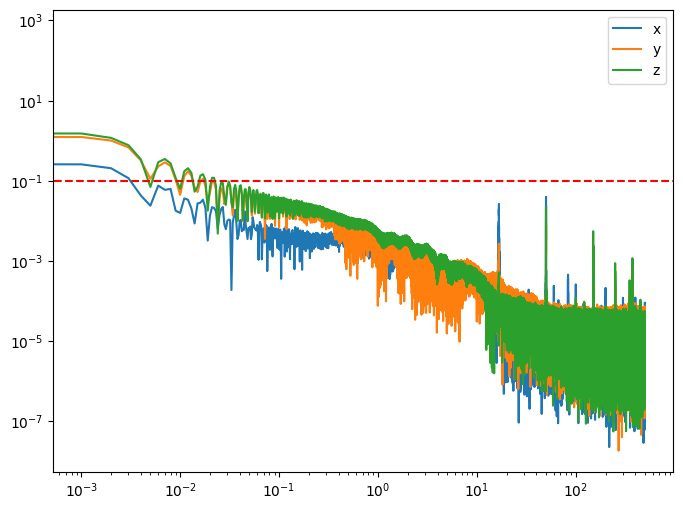

In [34]:
fig,ax = plt.subplots(figsize = (8,6))
plot_ax_freqmap(ax,freq,asd_x,label = 'x')
plot_ax_freqmap(ax,freq,asd_y,label = 'y')
plot_ax_freqmap(ax,freq,asd_z,label = 'z')
ax.set_yscale('log')
ax.set_xscale('log')
ax.axhline(0.1,0.001,500,linestyle='--',c='r')
ax.legend()

In [25]:
samplename = '2025_06_04_15_04_test2'
filepath = dir+'mag_2025_06_04_15_04.csv'
fs=1000.

plot complete 2025_06_04_15_04.


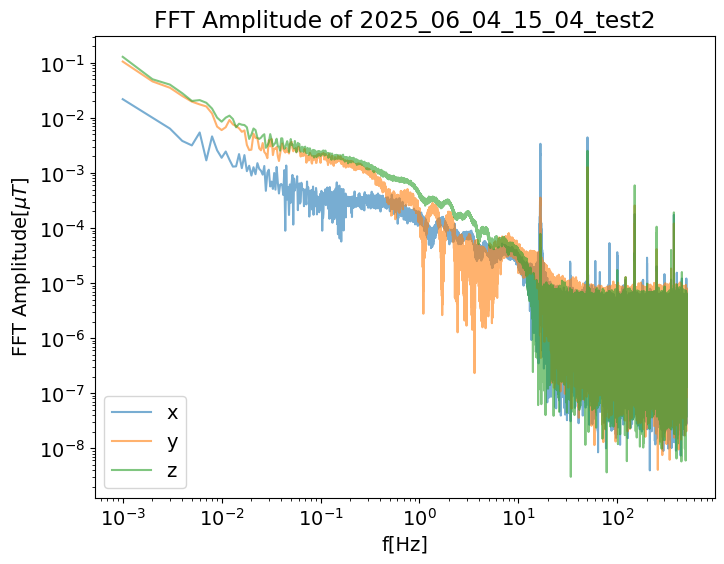

In [26]:
fig,ax = plot_sample_ps(filepath,fs=fs)
ax.legend(loc='lower left')
ax.set_title('FFT Amplitude of '+ samplename)
fig.savefig(FIGOUTPS+samplename+'_ps.png',dpi=200)

plot sample /home/gw-group/20250605_Bedretto/mag_2025_06_04_15_04.csv:
! Warning, no Lbin, taken default
plot complete /home/gw-group/20250605_Bedretto/mag_2025_06_04_15_04.csv.


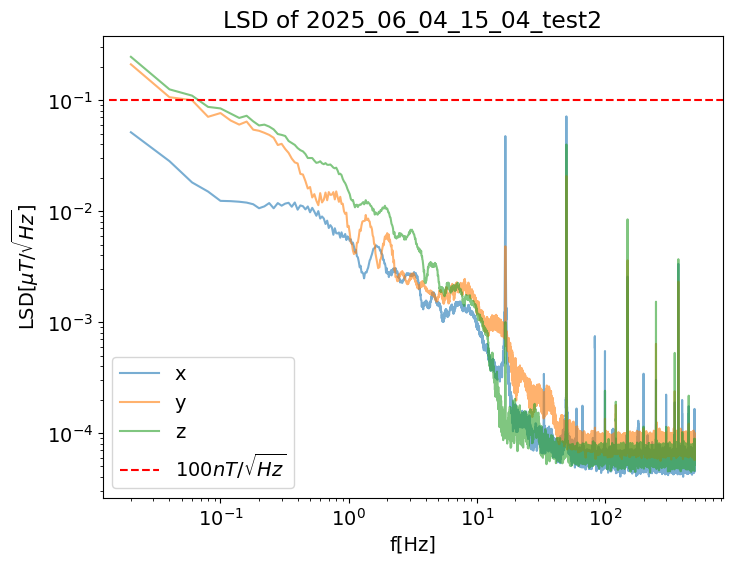

In [27]:
fig,ax = plot_sample_psd(filepath,fs=fs)
ax.set_title('LSD of '+ samplename)
ax.axhline(0.1,1e-2,0.5e3,label = r'$100nT/\sqrt{Hz}$',linestyle='--',c='r')
ax.legend(loc='lower left')
fig.savefig(FIGOUTPSD+samplename+'_psd.png',dpi=200)

## 1000s test3

In [35]:
fs = 1000.
dset = load_csv(dir+'mag_2025_06_05_09_10.csv')

In [36]:
dc_x = np.mean(dset['x'])
dc_y = np.mean(dset['y'])
dc_z = np.mean(dset['z'])
std_x = np.std(dset['x'])
std_y = np.std(dset['y'])
std_z = np.std(dset['z'])

depth = 16 # bit
scope = 10.*1000./143. # V
sample_err = scope /2**depth

print(' x:',dc_x,'\n y:',dc_y,'\n z:',dc_z)
print('sx:',std_x,'\nsy:',std_y,'\nsz:',std_z)
print('sys err 16 bit daq:',sample_err)
print('dc component amplitude:', np.sqrt(dc_x**2+dc_y**2+dc_z**2))
print(len(dset['x']))

 x: 43.83993656377071 
 y: -17.768186931208042 
 z: 21.333563768359195
sx: 0.0664747781352418 
sy: 0.14561426849759299 
sz: 0.04301662441663869
sys err 16 bit daq: 0.0010670481861888112
dc component amplitude: 51.89190156273367
999974


In [37]:
freq, asd_x = fft_asd(dset['x'],fs)
_, asd_y = fft_asd(dset['y'],fs)
_, asd_z = fft_asd(dset['z'],fs)

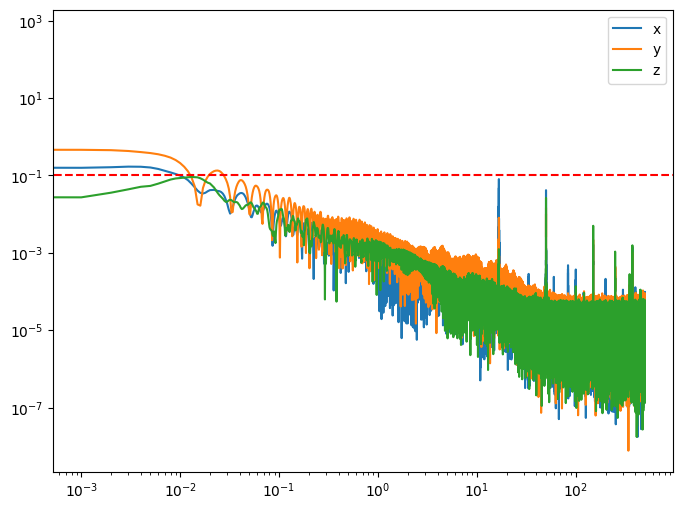

In [38]:
fig,ax = plt.subplots(figsize = (8,6))
plot_ax_freqmap(ax,freq,asd_x,label = 'x')
plot_ax_freqmap(ax,freq,asd_y,label = 'y')
plot_ax_freqmap(ax,freq,asd_z,label = 'z')
ax.set_yscale('log')
ax.set_xscale('log')
ax.axhline(0.1,0.001,500,linestyle='--',c='r')
ax.legend()

plot complete 2025_06_05_09_10.
plot sample /home/gw-group/20250605_Bedretto/mag_2025_06_05_09_10.csv:
! Warning, no Lbin, taken default
plot complete /home/gw-group/20250605_Bedretto/mag_2025_06_05_09_10.csv.


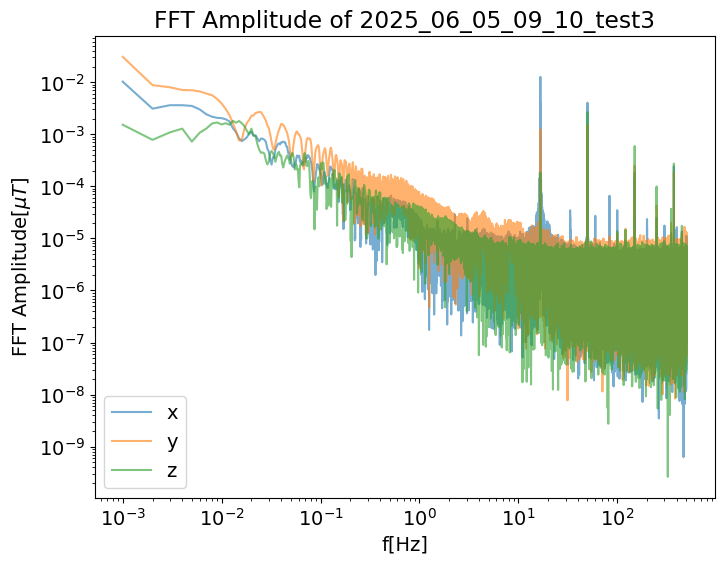

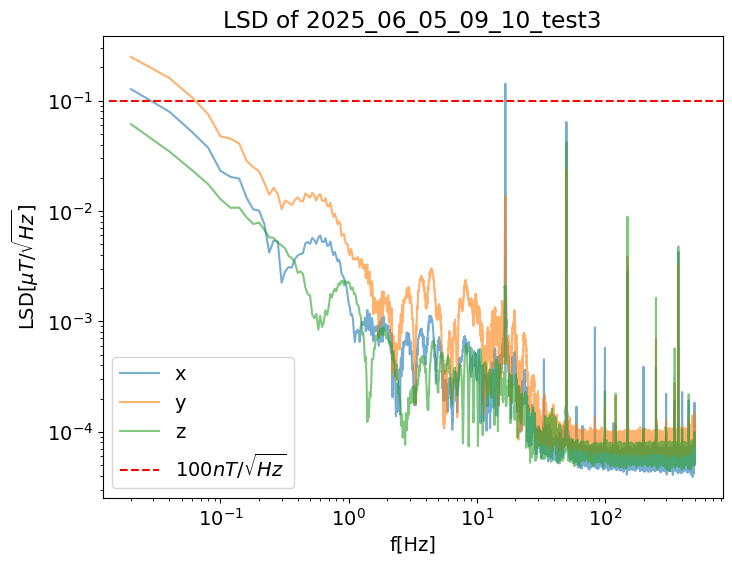

In [29]:
samplename = '2025_06_05_09_10_test3'
filepath = dir+'mag_2025_06_05_09_10.csv'
fs=1000.
fig,ax = plot_sample_ps(filepath,fs=fs)
ax.legend(loc='lower left')
ax.set_title('FFT Amplitude of '+ samplename)
fig.savefig(FIGOUTPS+samplename+'_ps.png',dpi=200)
fig,ax = plot_sample_psd(filepath,fs=fs)
ax.set_title('LSD of '+ samplename)
ax.axhline(0.1,1e-2,0.5e3,label = r'$100nT/\sqrt{Hz}$',linestyle='--',c='r')
ax.legend(loc='lower left')
fig.savefig(FIGOUTPSD+samplename+'_psd.png',dpi=200)

### Zoom-In

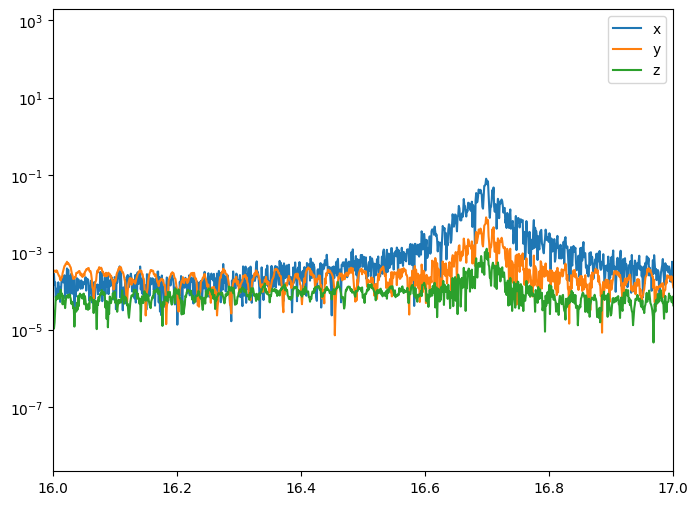

In [61]:
fig,ax = plt.subplots(figsize = (8,6))
plot_ax_freqmap(ax,freq,asd_x,label = 'x')
plot_ax_freqmap(ax,freq,asd_y,label = 'y')
plot_ax_freqmap(ax,freq,asd_z,label = 'z')
ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlim(16,17)
ax.legend()

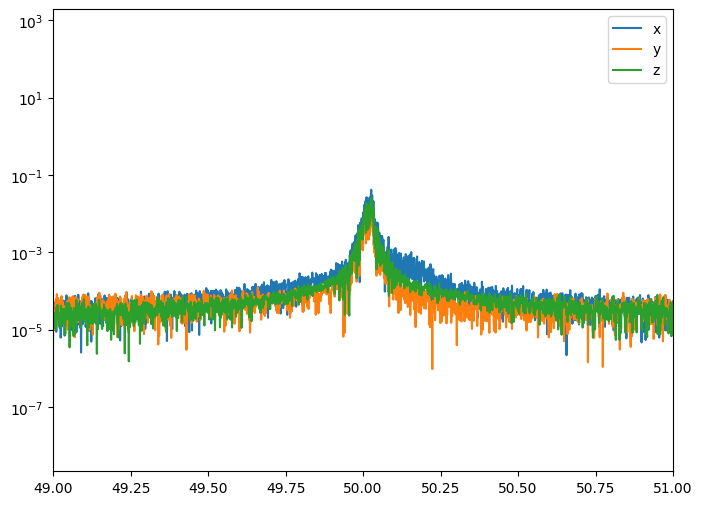

In [62]:
fig,ax = plt.subplots(figsize = (8,6))
plot_ax_freqmap(ax,freq,asd_x,label = 'x')
plot_ax_freqmap(ax,freq,asd_y,label = 'y')
plot_ax_freqmap(ax,freq,asd_z,label = 'z')
ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlim(49,51)
ax.legend()

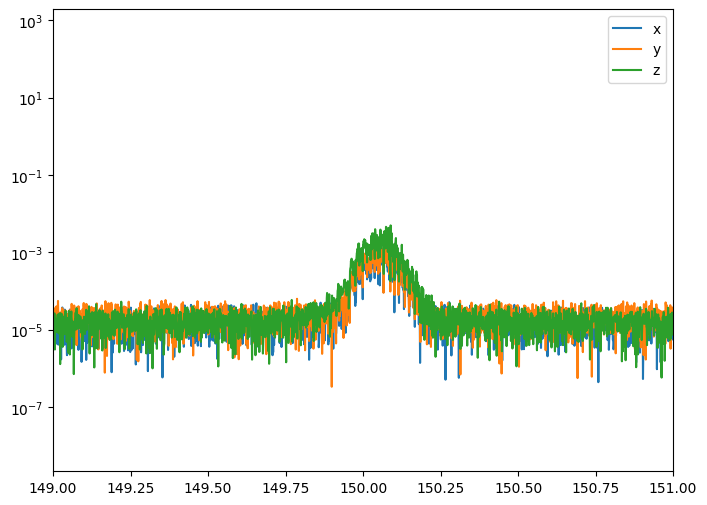

In [63]:
fig,ax = plt.subplots(figsize = (8,6))
plot_ax_freqmap(ax,freq,asd_x,label = 'x')
plot_ax_freqmap(ax,freq,asd_y,label = 'y')
plot_ax_freqmap(ax,freq,asd_z,label = 'z')
ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlim(149,151)
ax.legend()

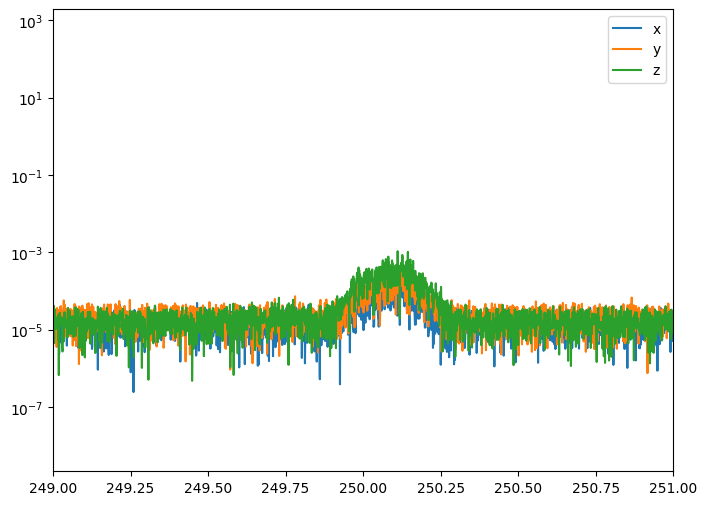

In [64]:
fig,ax = plt.subplots(figsize = (8,6))
plot_ax_freqmap(ax,freq,asd_x,label = 'x')
plot_ax_freqmap(ax,freq,asd_y,label = 'y')
plot_ax_freqmap(ax,freq,asd_z,label = 'z')
ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlim(249,251)
ax.legend()

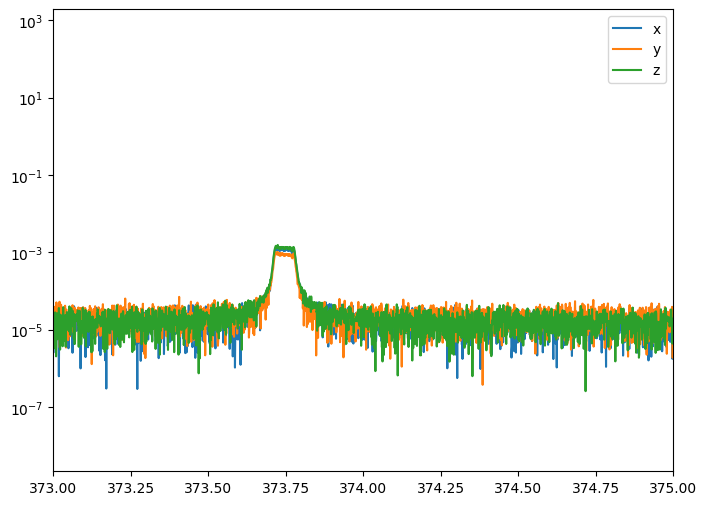

In [65]:
fig,ax = plt.subplots(figsize = (8,6))
plot_ax_freqmap(ax,freq,asd_x,label = 'x')
plot_ax_freqmap(ax,freq,asd_y,label = 'y')
plot_ax_freqmap(ax,freq,asd_z,label = 'z')
ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlim(373,375)
ax.legend()

## 1000s test4

In [67]:
fs = 1000.
dset = load_csv(dir+'mag_2025_06_05_09_27.csv')

In [68]:
print_dc(dset)

Ns: 999892
 x: 43.966835890735176 
 y: -16.775856084940568 
 z: 21.84969961748787
sx: 0.07282384480714886 
sy: 0.4772054856158399 
sz: 0.391693710980269
ex: 7.282777761332861e-05 
ey: 0.0004772312567995478 
ez: 0.00039171486415408443
sys err 16 bit daq: 0.0010670481861888112
dc component amplitude: 51.883729424550104


In [69]:
freq, asd_x = fft_asd(dset['x'],fs)
_, asd_y = fft_asd(dset['y'],fs)
_, asd_z = fft_asd(dset['z'],fs)

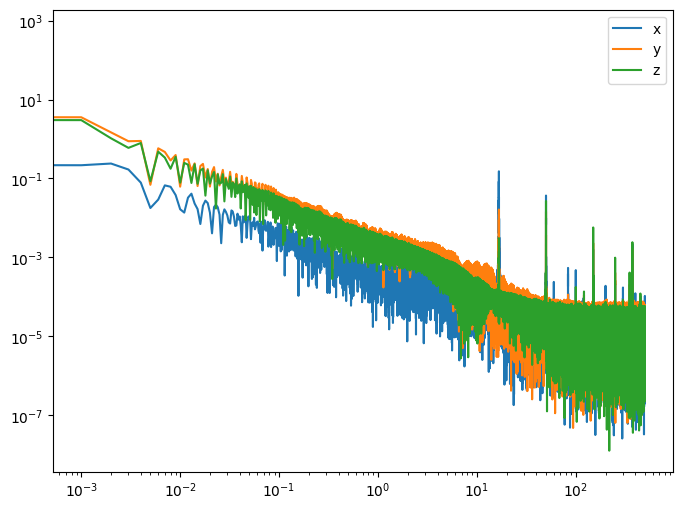

In [70]:
fig,ax = plt.subplots(figsize = (8,6))
plot_ax_freqmap(ax,freq,asd_x,label = 'x')
plot_ax_freqmap(ax,freq,asd_y,label = 'y')
plot_ax_freqmap(ax,freq,asd_z,label = 'z')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()

## 1000s test 5

In [71]:
fs = 1000.
dset = load_csv(dir+'mag_2025_06_05_09_44.csv')

In [72]:
print_dc(dset)

Ns: 999683
 x: 43.87276168388429 
 y: -16.461075395049175 
 z: 22.272953780751237
sx: 0.02304484944264552 
sy: 0.022739464215578105 
sz: 0.018275689378505267
ex: 2.304850291991935e-05 
ey: 2.274306927778246e-05 
ez: 1.8278586764143394e-05
sys err 16 bit daq: 0.0010670481861888112
dc component amplitude: 51.88324094591509


In [73]:
freq, asd_x = fft_asd(dset['x'],fs)
_, asd_y = fft_asd(dset['y'],fs)
_, asd_z = fft_asd(dset['z'],fs)

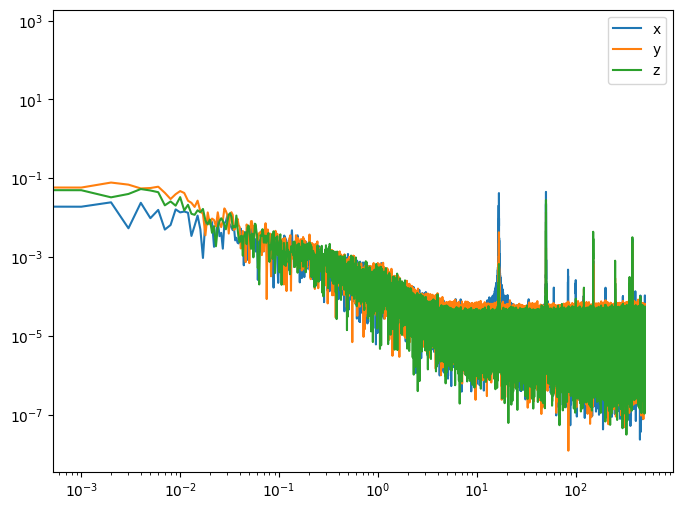

In [74]:
fig,ax = plt.subplots(figsize = (8,6))
plot_ax_freqmap(ax,freq,asd_x,label = 'x')
plot_ax_freqmap(ax,freq,asd_y,label = 'y')
plot_ax_freqmap(ax,freq,asd_z,label = 'z')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()

## 1000s lunchbreak test1

Ns: 999888
 x: 43.90792042296677 
 y: -16.28610896724193 
 z: 22.45273443451964
sx: 0.04027756010627867 
sy: 0.024747060435575282 
sz: 0.01819918643021151
ex: 4.027981583912795e-05 
ey: 2.4748446387380714e-05 
ez: 1.8200205670268568e-05
sys err 16 bit daq: 0.0010670481861888112
dc component amplitude: 51.93522989984279


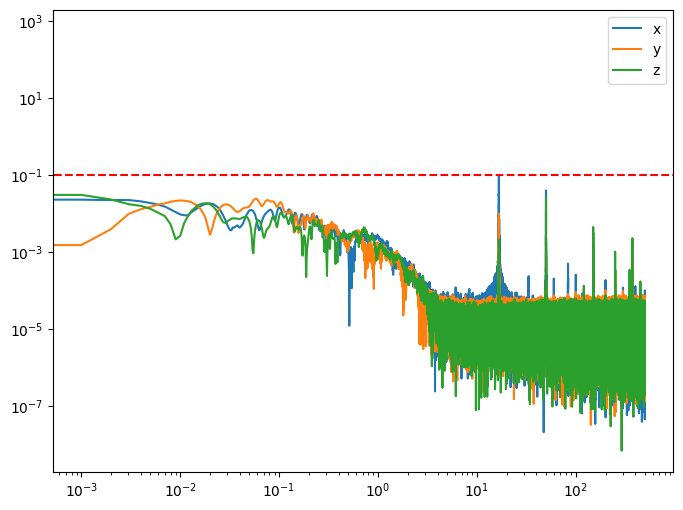

In [14]:
fs = 1000.
dset = load_csv(dir+'mag_2025_06_05_10_13.csv')
print_dc(dset)
freq, asd_x = fft_asd(dset['x'],fs)
_, asd_y = fft_asd(dset['y'],fs)
_, asd_z = fft_asd(dset['z'],fs)
fig,ax = plt.subplots(figsize = (8,6))
plot_ax_freqmap(ax,freq,asd_x,label = 'x')
plot_ax_freqmap(ax,freq,asd_y,label = 'y')
plot_ax_freqmap(ax,freq,asd_z,label = 'z')
ax.set_yscale('log')
ax.set_xscale('log')
ax.axhline(0.1,0.001,500,linestyle='--',c='r')
ax.legend()

plot complete 2025_06_05_10_13.
plot sample /home/gw-group/20250605_Bedretto/mag_2025_06_05_10_13.csv:
! Warning, no Lbin, taken default
plot complete /home/gw-group/20250605_Bedretto/mag_2025_06_05_10_13.csv.


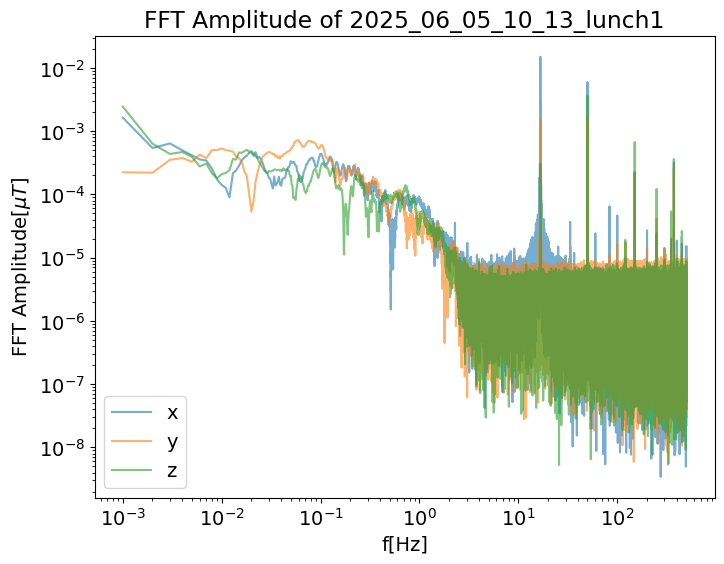

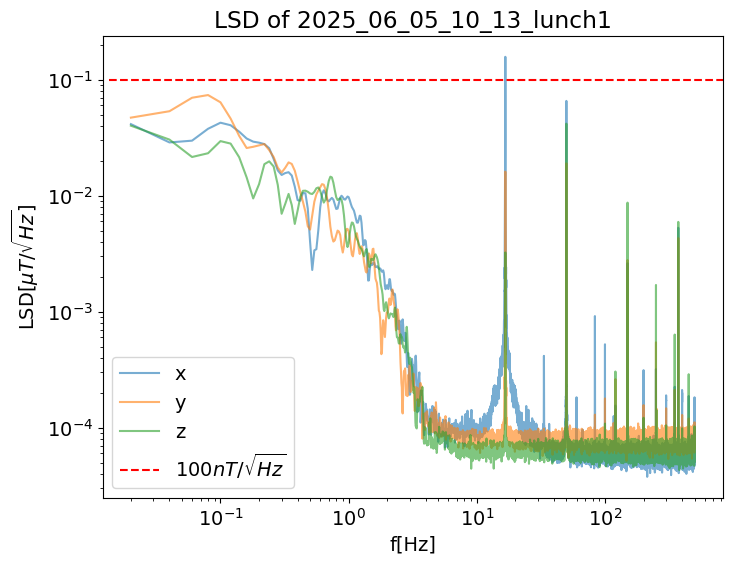

In [30]:
samplename = '2025_06_05_10_13_lunch1'
filepath = dir+'mag_2025_06_05_10_13.csv'
fs=1000.
fig,ax = plot_sample_ps(filepath,fs=fs)
ax.legend(loc='lower left')
ax.set_title('FFT Amplitude of '+ samplename)
fig.savefig(FIGOUTPS+samplename+'_ps.png',dpi=200)
fig,ax = plot_sample_psd(filepath,fs=fs)
ax.set_title('LSD of '+ samplename)
ax.axhline(0.1,1e-2,0.5e3,label = r'$100nT/\sqrt{Hz}$',linestyle='--',c='r')
ax.legend(loc='lower left')
fig.savefig(FIGOUTPSD+samplename+'_psd.png',dpi=200)

## 1000s lunchbreak test2

Ns: 999883
 x: 43.90761013912955 
 y: -16.287478375329556 
 z: 22.461284604511217
sx: 0.06460376011170613 
sy: 0.008114960566473227 
sz: 0.010420182284167091
ex: 6.460753976334032e-05 
ey: 8.115435333327562e-06 
ez: 1.0420791918326634e-05
sys err 16 bit daq: 0.0010670481861888112
dc component amplitude: 51.93909400481946


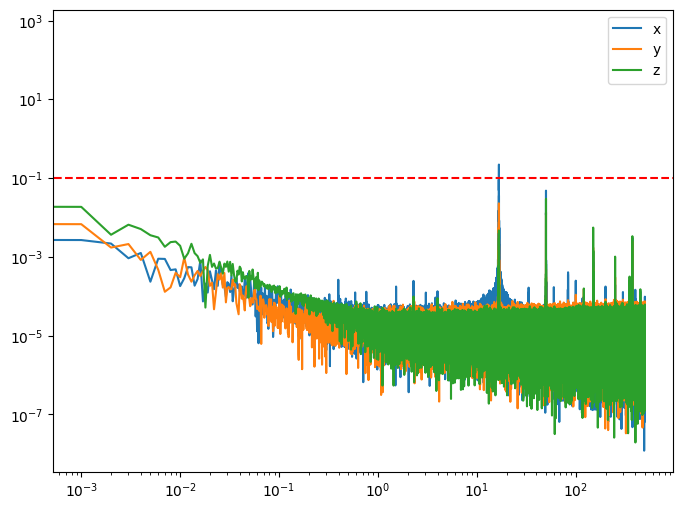

In [15]:
fs = 1000.
dset = load_csv(dir+'mag_2025_06_05_10_30.csv')
print_dc(dset)
freq, asd_x = fft_asd(dset['x'],fs)
_, asd_y = fft_asd(dset['y'],fs)
_, asd_z = fft_asd(dset['z'],fs)
fig,ax = plt.subplots(figsize = (8,6))
plot_ax_freqmap(ax,freq,asd_x,label = 'x')
plot_ax_freqmap(ax,freq,asd_y,label = 'y')
plot_ax_freqmap(ax,freq,asd_z,label = 'z')
ax.set_yscale('log')
ax.set_xscale('log')
ax.axhline(0.1,0.001,500,linestyle='--',c='r')
ax.legend()

plot complete 2025_06_05_10_30.
plot sample /home/gw-group/20250605_Bedretto/mag_2025_06_05_10_30.csv:
! Warning, no Lbin, taken default
plot complete /home/gw-group/20250605_Bedretto/mag_2025_06_05_10_30.csv.


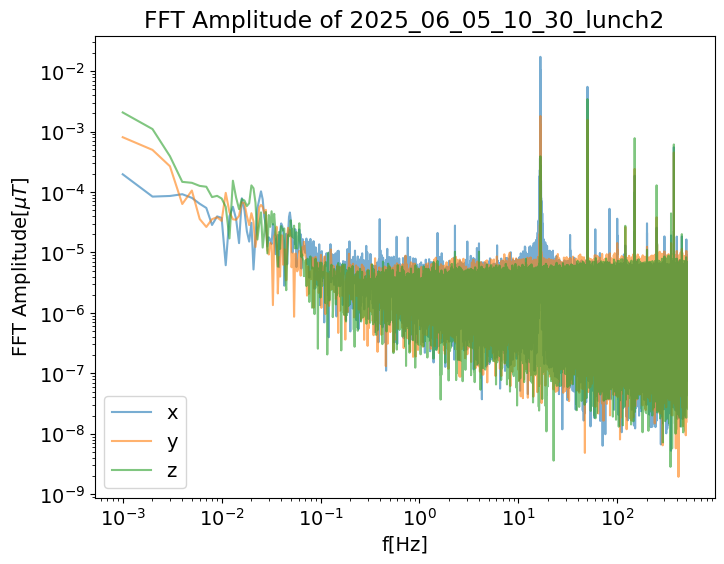

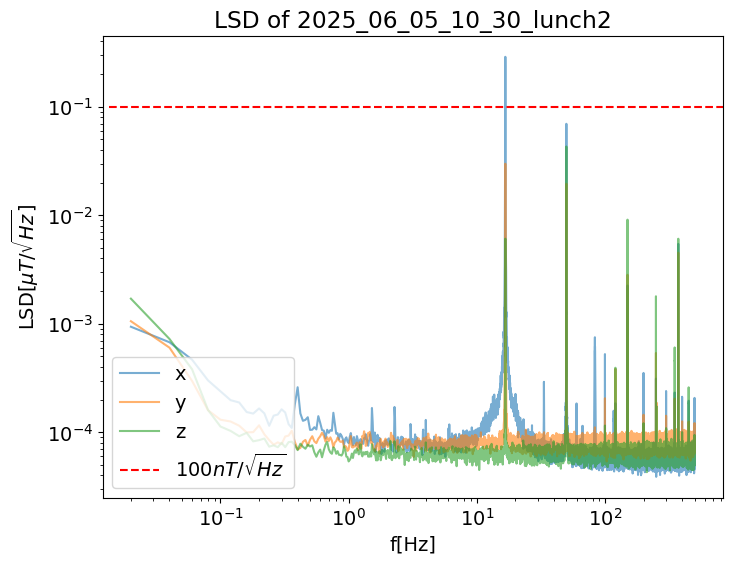

In [31]:
samplename = '2025_06_05_10_30_lunch2'
filepath = dir+'mag_2025_06_05_10_30.csv'
fs=1000.
fig,ax = plot_sample_ps(filepath,fs=fs)
ax.legend(loc='lower left')
ax.set_title('FFT Amplitude of '+ samplename)
fig.savefig(FIGOUTPS+samplename+'_ps.png',dpi=200)
fig,ax = plot_sample_psd(filepath,fs=fs)
ax.set_title('LSD of '+ samplename)
ax.axhline(0.1,1e-2,0.5e3,label = r'$100nT/\sqrt{Hz}$',linestyle='--',c='r')
ax.legend(loc='lower left')
fig.savefig(FIGOUTPSD+samplename+'_psd.png',dpi=200)

## 1000s lunchbreak test 3

Ns: 999783
 x: 43.906198314256585 
 y: -16.28773980449488 
 z: 22.468953434263963
sx: 0.03317942147472087 
sy: 0.0054456372591937426 
sz: 0.010290599483012317
ex: 3.318302202795151e-05 
ey: 5.446228207014862e-06 
ez: 1.0291716194804355e-05
sys err 16 bit daq: 0.0010670481861888112
dc component amplitude: 51.94129943292598


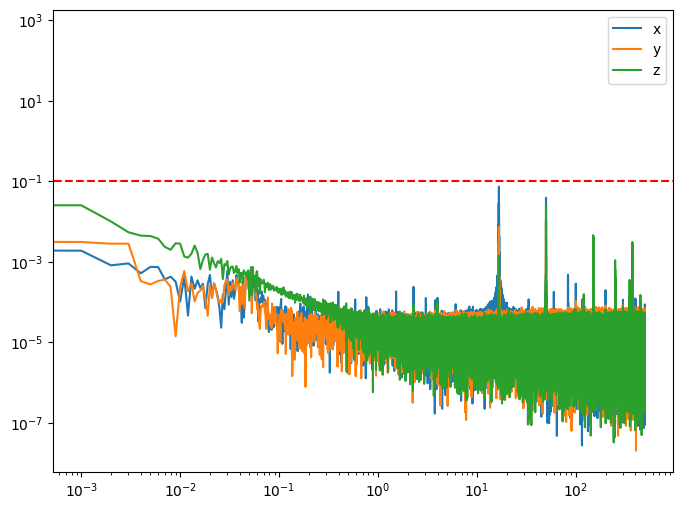

In [16]:
fs = 1000.
dset = load_csv(dir+'mag_2025_06_05_10_47.csv')
print_dc(dset)
freq, asd_x = fft_asd(dset['x'],fs)
_, asd_y = fft_asd(dset['y'],fs)
_, asd_z = fft_asd(dset['z'],fs)
fig,ax = plt.subplots(figsize = (8,6))
plot_ax_freqmap(ax,freq,asd_x,label = 'x')
plot_ax_freqmap(ax,freq,asd_y,label = 'y')
plot_ax_freqmap(ax,freq,asd_z,label = 'z')
ax.set_yscale('log')
ax.set_xscale('log')
ax.axhline(0.1,0.001,500,linestyle='--',c='r')
ax.legend()

plot complete 2025_06_05_10_47.
plot sample /home/gw-group/20250605_Bedretto/mag_2025_06_05_10_47.csv:
! Warning, no Lbin, taken default
plot complete /home/gw-group/20250605_Bedretto/mag_2025_06_05_10_47.csv.


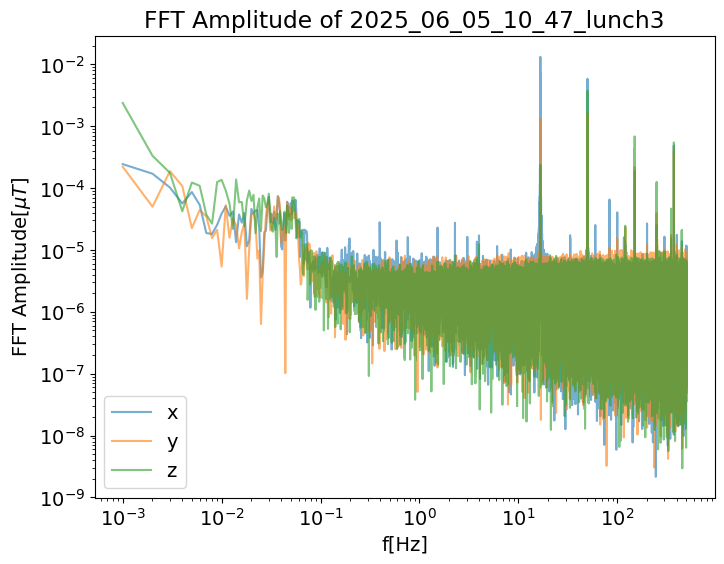

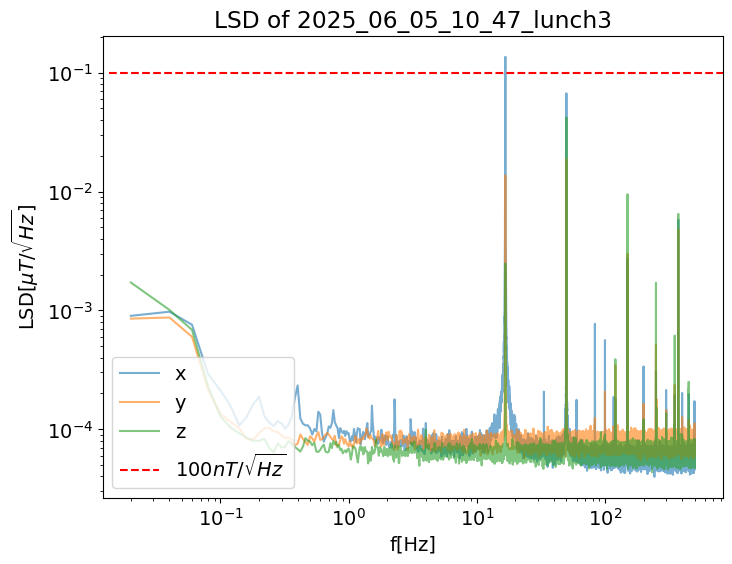

In [32]:
samplename = '2025_06_05_10_47_lunch3'
filepath = dir+'mag_2025_06_05_10_47.csv'
fs=1000.
fig,ax = plot_sample_ps(filepath,fs=fs)
ax.legend(loc='lower left')
ax.set_title('FFT Amplitude of '+ samplename)
fig.savefig(FIGOUTPS+samplename+'_ps.png',dpi=200)
fig,ax = plot_sample_psd(filepath,fs=fs)
ax.set_title('LSD of '+ samplename)
ax.axhline(0.1,1e-2,0.5e3,label = r'$100nT/\sqrt{Hz}$',linestyle='--',c='r')
ax.legend(loc='lower left')
fig.savefig(FIGOUTPSD+samplename+'_psd.png',dpi=200)

## 1000s lunchbreak test 4

Ns: 999974
 x: 43.906503325771794 
 y: -16.28534372772591 
 z: 22.47715692660436
sx: 0.06350886111143655 
sy: 0.007679946035420935 
sz: 0.009792724828567773
ex: 6.350968674273084e-05 
ey: 7.680045876666304e-06 
ez: 9.792852136473053e-06
sys err 16 bit daq: 0.0010670481861888112
dc component amplitude: 51.94435520948729


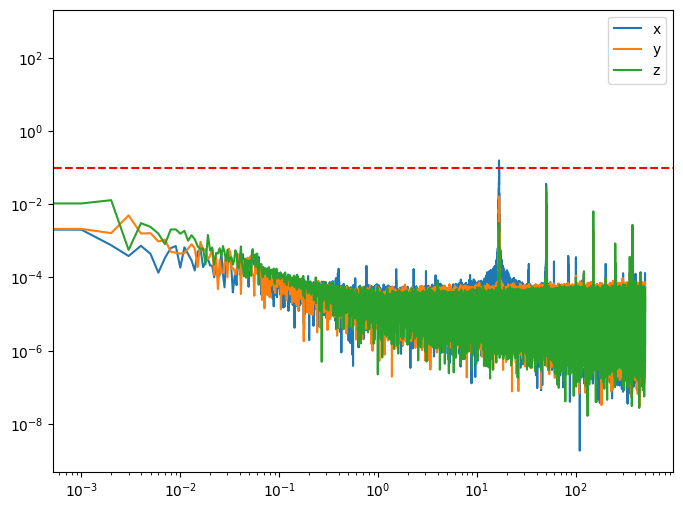

In [17]:
fs = 1000.
dset = load_csv(dir+'mag_2025_06_05_11_04.csv')
print_dc(dset)
freq, asd_x = fft_asd(dset['x'],fs)
_, asd_y = fft_asd(dset['y'],fs)
_, asd_z = fft_asd(dset['z'],fs)
fig,ax = plt.subplots(figsize = (8,6))
plot_ax_freqmap(ax,freq,asd_x,label = 'x')
plot_ax_freqmap(ax,freq,asd_y,label = 'y')
plot_ax_freqmap(ax,freq,asd_z,label = 'z')
ax.set_yscale('log')
ax.set_xscale('log')
ax.axhline(0.1,0.001,500,linestyle='--',c='r')
ax.legend()

plot complete 2025_06_05_11_04.
plot sample /home/gw-group/20250605_Bedretto/mag_2025_06_05_11_04.csv:
! Warning, no Lbin, taken default
plot complete /home/gw-group/20250605_Bedretto/mag_2025_06_05_11_04.csv.


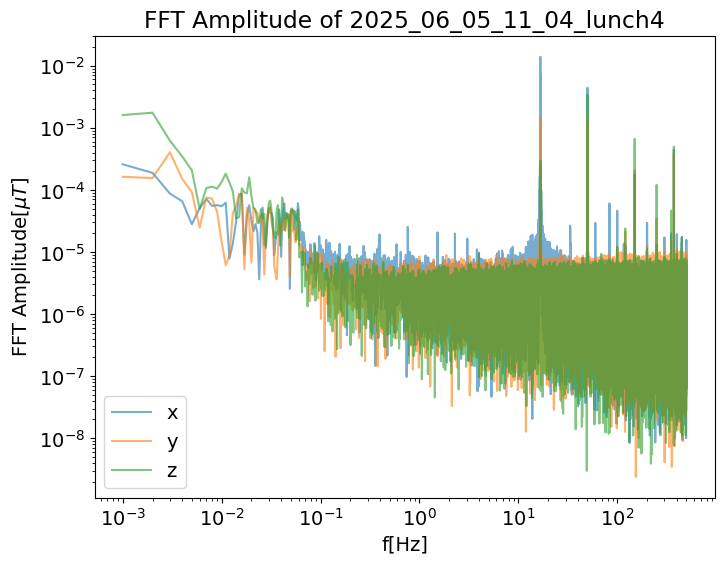

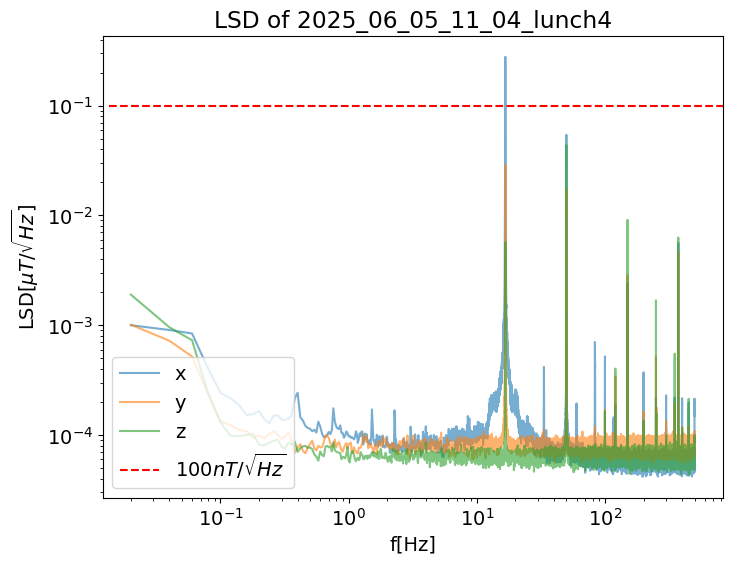

In [33]:
samplename = '2025_06_05_11_04_lunch4'
filepath = dir+'mag_2025_06_05_11_04.csv'
fs=1000.
fig,ax = plot_sample_ps(filepath,fs=fs)
ax.legend(loc='lower left')
ax.set_title('FFT Amplitude of '+ samplename)
fig.savefig(FIGOUTPS+samplename+'_ps.png',dpi=200)
fig,ax = plot_sample_psd(filepath,fs=fs)
ax.set_title('LSD of '+ samplename)
ax.axhline(0.1,1e-2,0.5e3,label = r'$100nT/\sqrt{Hz}$',linestyle='--',c='r')
ax.legend(loc='lower left')
fig.savefig(FIGOUTPSD+samplename+'_psd.png',dpi=200)

## Highrate test 1

Ns: 999923
 x: 43.926888727346096 
 y: -16.731549519795394 
 z: 22.04874458211915
sx: 0.13174525167077547 
sy: 0.4499625950288688 
sz: 0.2008758705569724
ex: 0.00013175032415590267 
ey: 0.0004499799195892772 
ez: 0.0002008836047246399
sys err 16 bit daq: 0.0010670481861888112
dc component amplitude: 51.91977889249471


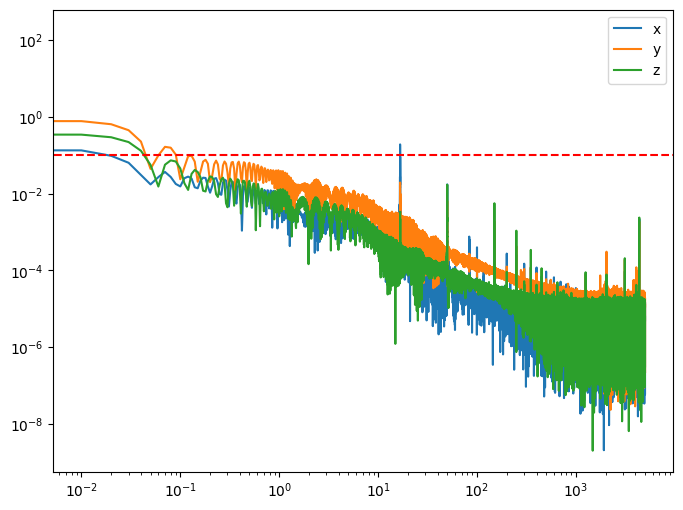

In [18]:
fs = 10000.
dset = load_csv(dir+'mag_2025_06_05_12_43.csv')
print_dc(dset)
freq, asd_x = fft_asd(dset['x'],fs)
_, asd_y = fft_asd(dset['y'],fs)
_, asd_z = fft_asd(dset['z'],fs)
fig,ax = plt.subplots(figsize = (8,6))
plot_ax_freqmap(ax,freq,asd_x,label = 'x')
plot_ax_freqmap(ax,freq,asd_y,label = 'y')
plot_ax_freqmap(ax,freq,asd_z,label = 'z')
ax.set_yscale('log')
ax.set_xscale('log')
ax.axhline(0.1,0.001,500,linestyle='--',c='r')
ax.legend()

plot complete 2025_06_05_12_43.
plot sample /home/gw-group/20250605_Bedretto/mag_2025_06_05_12_43.csv:
! Warning, no Lbin, taken default
plot complete /home/gw-group/20250605_Bedretto/mag_2025_06_05_12_43.csv.


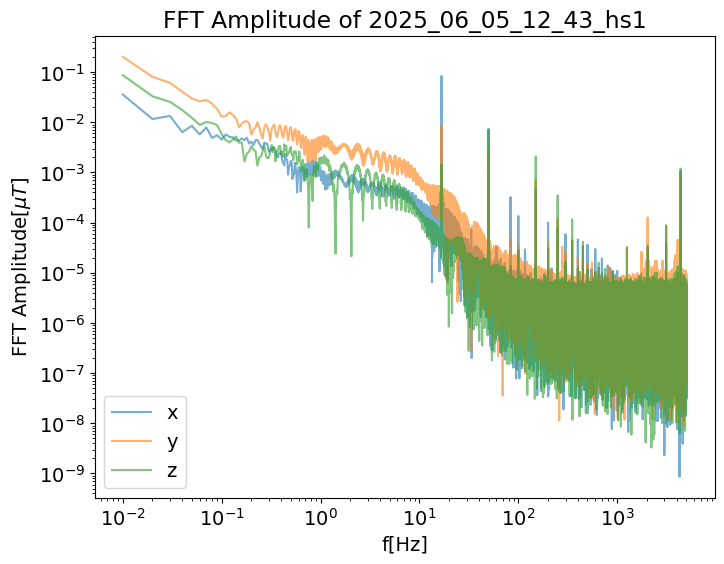

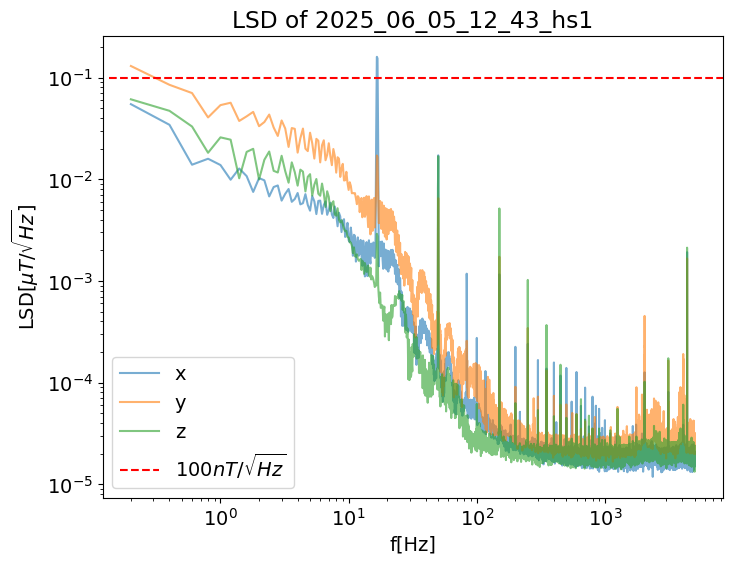

In [34]:
samplename = '2025_06_05_12_43_hs1'
filepath = dir+'mag_2025_06_05_12_43.csv'
fs=10000.
fig,ax = plot_sample_ps(filepath,fs=fs)
ax.legend(loc='lower left')
ax.set_title('FFT Amplitude of '+ samplename)
fig.savefig(FIGOUTPS+samplename+'_ps.png',dpi=200)
fig,ax = plot_sample_psd(filepath,fs=fs)
ax.set_title('LSD of '+ samplename)
ax.axhline(0.1,1e-2,0.5e3,label = r'$100nT/\sqrt{Hz}$',linestyle='--',c='r')
ax.legend(loc='lower left')
fig.savefig(FIGOUTPSD+samplename+'_psd.png',dpi=200)

## Highrate test 2

Ns: 999909
 x: 43.901488519257136 
 y: -16.936860121406024 
 z: 21.95753524569473
sx: 0.07189573296529736 
sy: 0.00940368712831555 
sz: 0.010461040185611524
ex: 7.189900444442744e-05 
ey: 9.404115025284079e-06 
ez: 1.0461516195427886e-05
sys err 16 bit daq: 0.0010670481861888112
dc component amplitude: 51.926209942999556


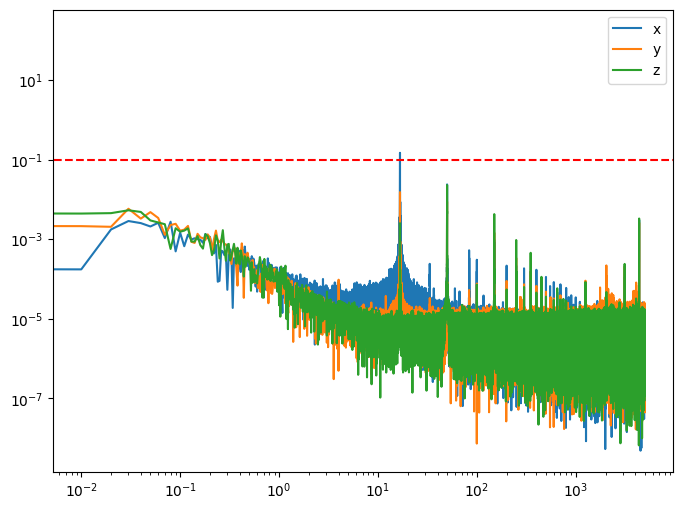

In [19]:
fs = 10000.
dset = load_csv(dir+'mag_2025_06_05_12_45.csv')
print_dc(dset)
freq, asd_x = fft_asd(dset['x'],fs)
_, asd_y = fft_asd(dset['y'],fs)
_, asd_z = fft_asd(dset['z'],fs)
fig,ax = plt.subplots(figsize = (8,6))
plot_ax_freqmap(ax,freq,asd_x,label = 'x')
plot_ax_freqmap(ax,freq,asd_y,label = 'y')
plot_ax_freqmap(ax,freq,asd_z,label = 'z')
ax.set_yscale('log')
ax.set_xscale('log')
ax.axhline(0.1,0.001,500,linestyle='--',c='r')
ax.legend()

plot complete 2025_06_05_12_45.
plot sample /home/gw-group/20250605_Bedretto/mag_2025_06_05_12_45.csv:
! Warning, no Lbin, taken default
plot complete /home/gw-group/20250605_Bedretto/mag_2025_06_05_12_45.csv.


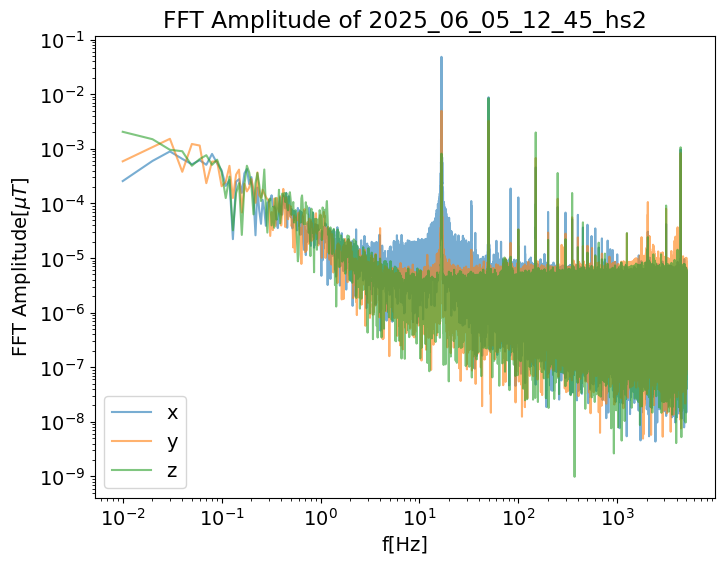

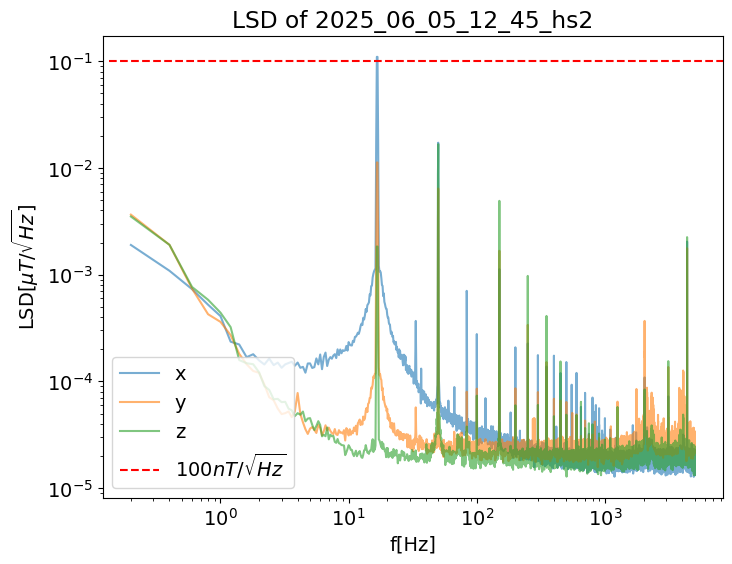

In [35]:
samplename = '2025_06_05_12_45_hs2'
filepath = dir+'mag_2025_06_05_12_45.csv'
fs=10000.
fig,ax = plot_sample_ps(filepath,fs=fs)
ax.legend(loc='lower left')
ax.set_title('FFT Amplitude of '+ samplename)
fig.savefig(FIGOUTPS+samplename+'_ps.png',dpi=200)
fig,ax = plot_sample_psd(filepath,fs=fs)
ax.set_title('LSD of '+ samplename)
ax.axhline(0.1,1e-2,0.5e3,label = r'$100nT/\sqrt{Hz}$',linestyle='--',c='r')
ax.legend(loc='lower left')
fig.savefig(FIGOUTPSD+samplename+'_psd.png',dpi=200)

## Highrate test 3

Ns: 999945
 x: 43.95234658424688 
 y: -17.2853277661276 
 z: 21.572355195655433
sx: 0.06908188467595702 
sy: 0.3383909179706455 
sz: 0.31305424170498136
ex: 6.908378450615397e-05 
ey: 0.0003384002241047695 
ez: 0.00031306285105176543
sys err 16 bit daq: 0.0010670481861888112
dc component amplitude: 51.92261390696488


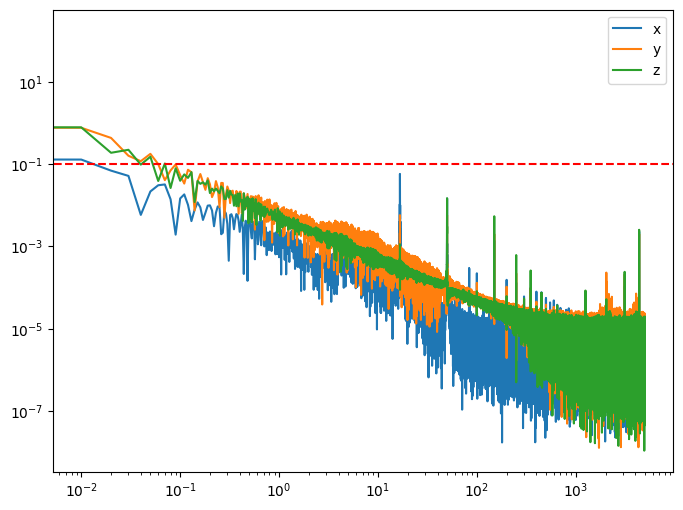

In [20]:
fs = 10000.
dset = load_csv(dir+'mag_2025_06_05_12_47.csv')
print_dc(dset)
freq, asd_x = fft_asd(dset['x'],fs)
_, asd_y = fft_asd(dset['y'],fs)
_, asd_z = fft_asd(dset['z'],fs)
fig,ax = plt.subplots(figsize = (8,6))
plot_ax_freqmap(ax,freq,asd_x,label = 'x')
plot_ax_freqmap(ax,freq,asd_y,label = 'y')
plot_ax_freqmap(ax,freq,asd_z,label = 'z')
ax.set_yscale('log')
ax.set_xscale('log')
ax.axhline(0.1,0.001,500,linestyle='--',c='r')
ax.legend()

plot complete 2025_06_05_12_47.
plot sample /home/gw-group/20250605_Bedretto/mag_2025_06_05_12_47.csv:
! Warning, no Lbin, taken default
plot complete /home/gw-group/20250605_Bedretto/mag_2025_06_05_12_47.csv.


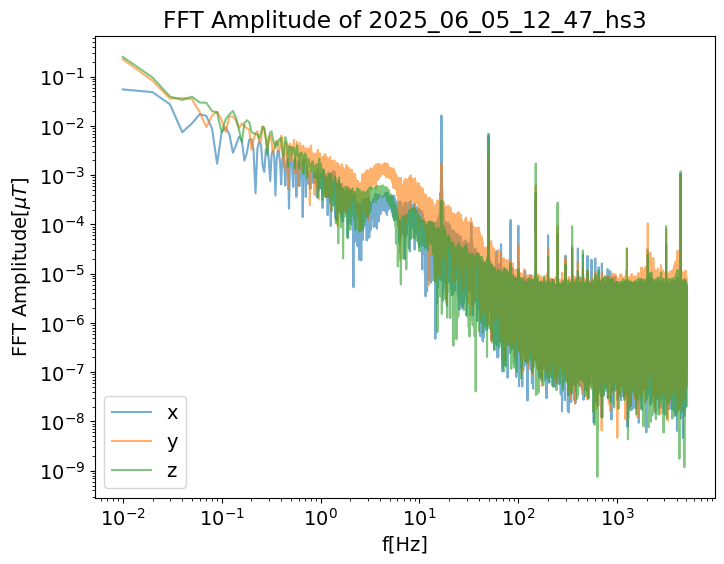

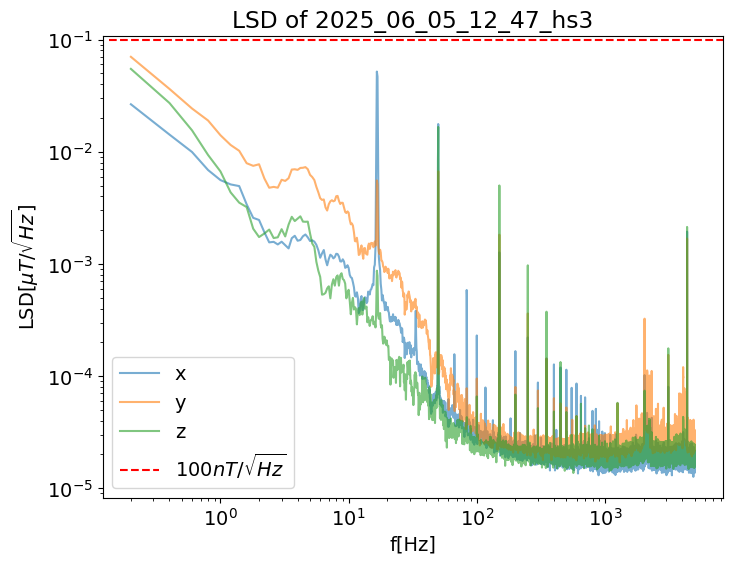

In [36]:
samplename = '2025_06_05_12_47_hs3'
filepath = dir+'mag_2025_06_05_12_47.csv'
fs=10000.
fig,ax = plot_sample_ps(filepath,fs=fs)
ax.legend(loc='lower left')
ax.set_title('FFT Amplitude of '+ samplename)
fig.savefig(FIGOUTPS+samplename+'_ps.png',dpi=200)
fig,ax = plot_sample_psd(filepath,fs=fs)
ax.set_title('LSD of '+ samplename)
ax.axhline(0.1,1e-2,0.5e3,label = r'$100nT/\sqrt{Hz}$',linestyle='--',c='r')
ax.legend(loc='lower left')
fig.savefig(FIGOUTPSD+samplename+'_psd.png',dpi=200)

## Highrate test 4 (higher rate)

Ns: 300105
 x: 43.9504534056142 
 y: -17.799159066215978 
 z: 21.185332395210953
sx: 0.012161134201082963 
sy: 0.0025523261532826172 
sz: 0.0020140962004415648
ex: 2.219920723453553e-05 
ey: 4.65907342769066e-06 
ez: 3.676576395309519e-06
sys err 16 bit daq: 0.0010670481861888112
dc component amplitude: 51.93525514252431


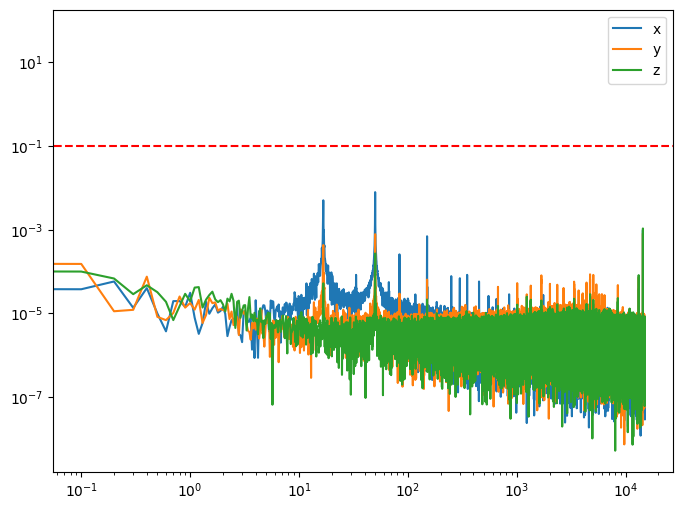

In [21]:
fs = 30018.
dset = load_csv(dir+'mag_2025_06_05_12_49.csv')
print_dc(dset)
freq, asd_x = fft_asd(dset['x'],fs)
_, asd_y = fft_asd(dset['y'],fs)
_, asd_z = fft_asd(dset['z'],fs)
fig,ax = plt.subplots(figsize = (8,6))
plot_ax_freqmap(ax,freq,asd_x,label = 'x')
plot_ax_freqmap(ax,freq,asd_y,label = 'y')
plot_ax_freqmap(ax,freq,asd_z,label = 'z')
ax.set_yscale('log')
ax.set_xscale('log')
ax.axhline(0.1,0.001,500,linestyle='--',c='r')
ax.legend()

plot complete 2025_06_05_12_49.
plot sample /home/gw-group/20250605_Bedretto/mag_2025_06_05_12_49.csv:
! Warning, no Lbin, taken default
plot complete /home/gw-group/20250605_Bedretto/mag_2025_06_05_12_49.csv.


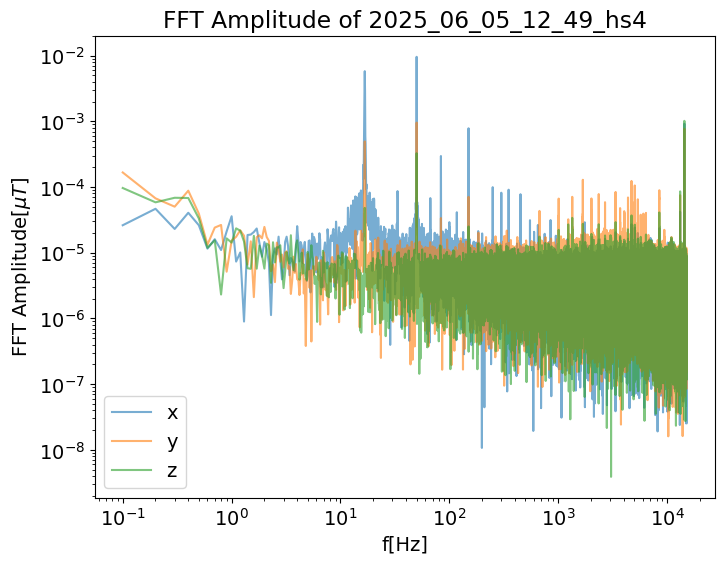

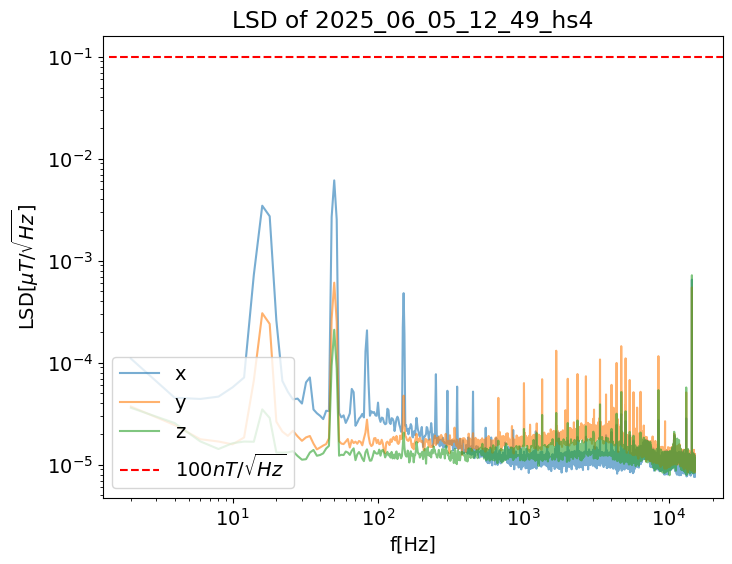

In [37]:
samplename = '2025_06_05_12_49_hs4'
filepath = dir+'mag_2025_06_05_12_49.csv'
fs=30018.
fig,ax = plot_sample_ps(filepath,fs=fs)
ax.legend(loc='lower left')
ax.set_title('FFT Amplitude of '+ samplename)
fig.savefig(FIGOUTPS+samplename+'_ps.png',dpi=200)
fig,ax = plot_sample_psd(filepath,fs=fs)
ax.set_title('LSD of '+ samplename)
ax.axhline(0.1,1e-2,0.5e3,label = r'$100nT/\sqrt{Hz}$',linestyle='--',c='r')
ax.legend(loc='lower left')
fig.savefig(FIGOUTPSD+samplename+'_psd.png',dpi=200)

# Local examples

Ns: 9931
 x: 55.16362568495889 
 y: 12.88402556209263 
 z: -16.84820987766813
sx: 0.03513499881591755 
sy: 0.003281215317633025 
sz: 0.010557004381076868
ex: 0.0003525684548215652 
ey: 3.292594431369745e-05 
ez: 0.00010593615618664891
sys err 16 bit daq: 0.0010670481861888112
dc component amplitude: 59.100642039464056


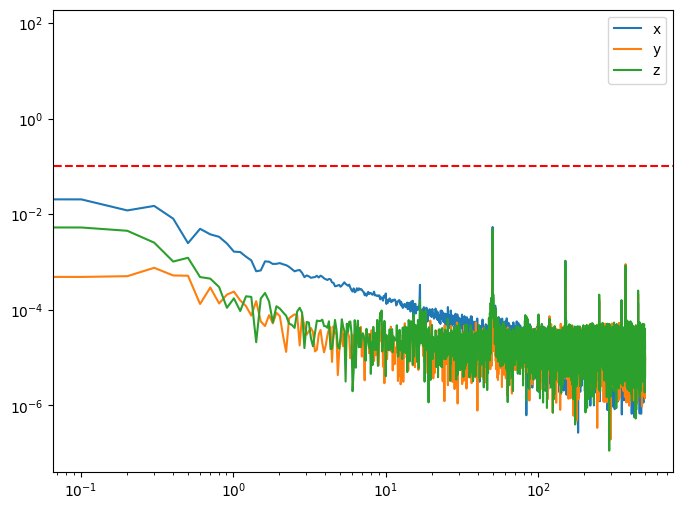

In [22]:
fs = 1000.
dset = load_csv('./bigmag_test3/mag_2025_06_04_14_34.csv')
print_dc(dset)
freq, asd_x = fft_asd(dset['x'],fs)
_, asd_y = fft_asd(dset['y'],fs)
_, asd_z = fft_asd(dset['z'],fs)
fig,ax = plt.subplots(figsize = (8,6))
plot_ax_freqmap(ax,freq,asd_x,label = 'x')
plot_ax_freqmap(ax,freq,asd_y,label = 'y')
plot_ax_freqmap(ax,freq,asd_z,label = 'z')
ax.set_yscale('log')
ax.set_xscale('log')
ax.axhline(0.1,0.001,500,linestyle='--',c='r')
ax.legend()

Ns: 9933
 x: 55.22842936218893 
 y: 12.873830610209145 
 z: -16.838259455641456
sx: 0.03938300490644426 
sy: 0.003959303430457563 
sz: 0.008559977676376116
ex: 0.0003951560465991877 
ey: 3.972634121197302e-05 
ez: 8.588798507400339e-05
sys err 16 bit daq: 0.0010670481861888112
dc component amplitude: 59.156080886838254


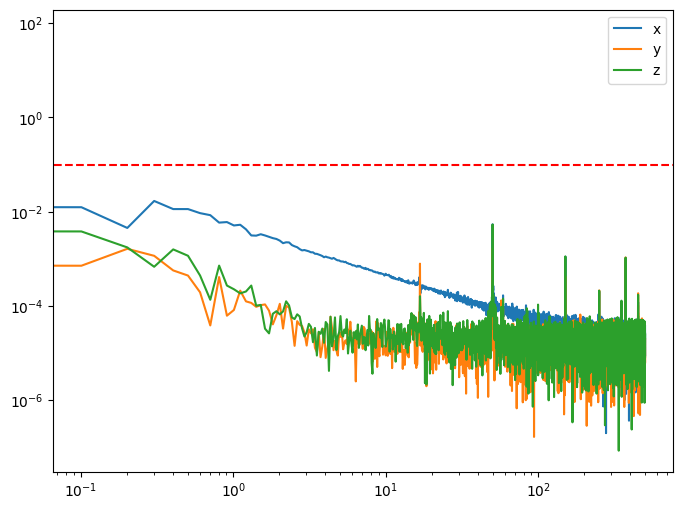

In [24]:
fs = 1000.
dset = load_csv('./bigmag_test3/mag_2025_06_04_14_32.csv')
print_dc(dset)
freq, asd_x = fft_asd(dset['x'],fs)
_, asd_y = fft_asd(dset['y'],fs)
_, asd_z = fft_asd(dset['z'],fs)
fig,ax = plt.subplots(figsize = (8,6))
plot_ax_freqmap(ax,freq,asd_x,label = 'x')
plot_ax_freqmap(ax,freq,asd_y,label = 'y')
plot_ax_freqmap(ax,freq,asd_z,label = 'z')
ax.set_yscale('log')
ax.set_xscale('log')
ax.axhline(0.1,0.001,500,linestyle='--',c='r')
ax.legend()

Ns: 9004651
 x: 1.9269686536214836 
 y: 2.854176724737937 
 z: 2.8923289496236486
sx: 0.01375343659829551 
sy: 0.014800707338039155 
sz: 0.013851318058723396
ex: 4.583294746623371e-06 
ey: 4.932294827109023e-06 
ez: 4.615913472871512e-06
sys err 16 bit daq: 0.0010670481861888112
dc component amplitude: 4.497232451286748


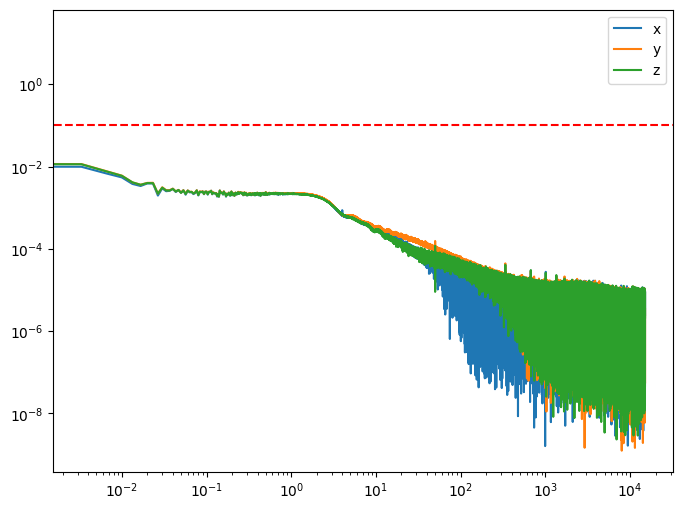

In [23]:
fs = 30018.
dset = load_hdf5('./bigmag_test4/mag_2025_06_12_09_29.hdf5')
print_dc(dset)
freq, asd_x = fft_asd(dset['x'],fs)
_, asd_y = fft_asd(dset['y'],fs)
_, asd_z = fft_asd(dset['z'],fs)
fig,ax = plt.subplots(figsize = (8,6))
plot_ax_freqmap(ax,freq,asd_x,label = 'x')
plot_ax_freqmap(ax,freq,asd_y,label = 'y')
plot_ax_freqmap(ax,freq,asd_z,label = 'z')
ax.set_yscale('log')
ax.set_xscale('log')
ax.axhline(0.1,0.001,500,linestyle='--',c='r')
ax.legend()

# Comparison to CERN paper

In [21]:
# plt.rcParams.keys()
plt.rcParams.update({'font.size': 16})

Ns: 999883
 x: 43.90761013912955 
 y: -16.287478375329556 
 z: 22.461284604511217
sx: 0.06460376011170613 
sy: 0.008114960566473227 
sz: 0.010420182284167091
ex: 6.460753976334032e-05 
ey: 8.115435333327562e-06 
ez: 1.0420791918326634e-05
sys err 16 bit daq: 0.0010670481861888112
dc component amplitude: 51.93909400481946


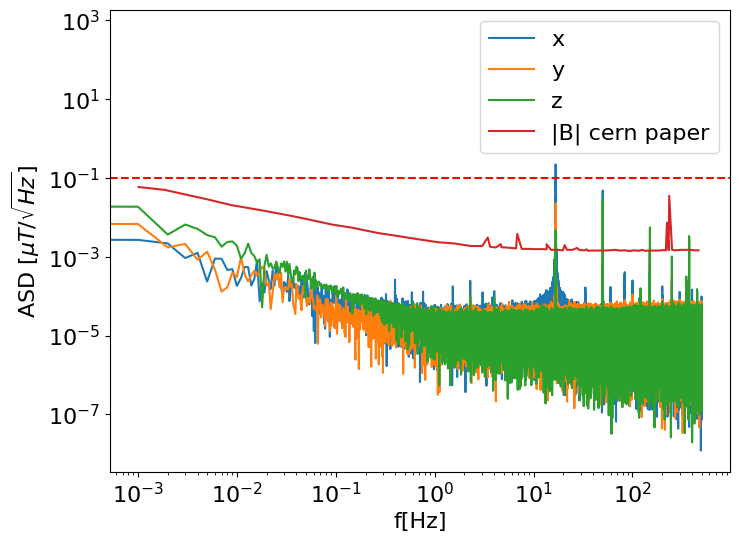

In [23]:
fs = 1000.

# one of the quieter samples
dset = load_csv('/home/gw-group/20250605_Bedretto/mag_2025_06_05_10_30.csv')
print_dc(dset)

freq, asd_x = fft_asd(dset['x'],fs)
_, asd_y = fft_asd(dset['y'],fs)
_, asd_z = fft_asd(dset['z'],fs)
fig,ax = plt.subplots(figsize = (8,6))
plot_ax_freqmap(ax,freq,asd_x,label = 'x')
plot_ax_freqmap(ax,freq,asd_y,label = 'y')
plot_ax_freqmap(ax,freq,asd_z,label = 'z')

psd_cern = np.genfromtxt('pixelized_PSD_bamp.csv',delimiter = ',')
plt.plot(psd_cern[:,0],psd_cern[:,1], label = '|B| cern paper')

ax.set_yscale('log')
ax.set_xscale('log')
ax.axhline(0.1,0.001,500,linestyle='--',c='r')
ax.legend()
ax.set_ylabel(r'ASD [$\mu T / \sqrt{Hz}]$')
ax.set_xlabel('f[Hz]')
fig.savefig('mag_06_05_10_30_cerncompare.png',dpi=200)

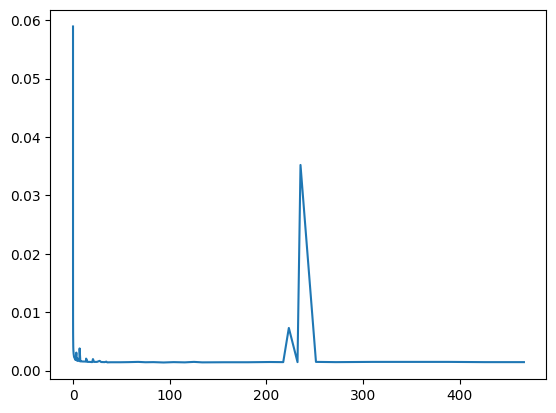

In [15]:
psd_cern = np.genfromtxt('pixelized_PSD_bamp.csv',delimiter = ',')
plt.plot(psd_cern[:,0],psd_cern[:,1], label = '|B| cern paper')

# Long aquisition

plot complete 2025_06_13_08_55.
plot sample 20250612_10h/mag_2025_06_13_08_55.csv:
! Warning, no Lbin, taken default
plot complete 20250612_10h/mag_2025_06_13_08_55.csv.


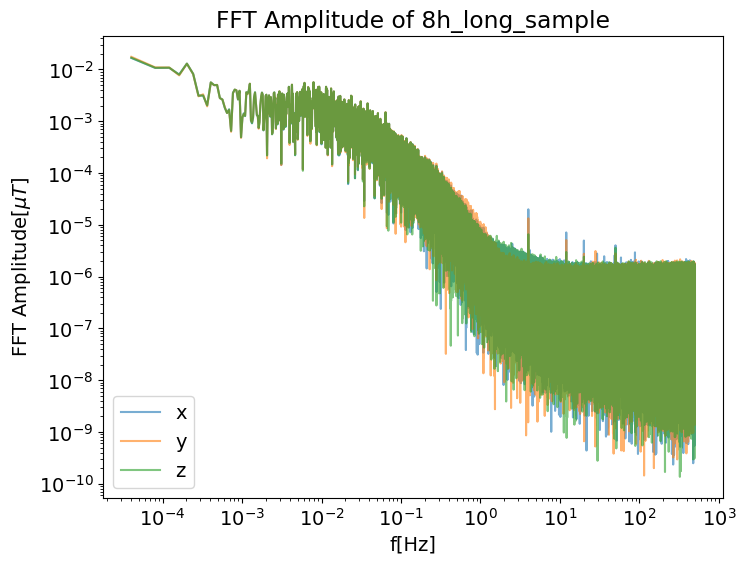

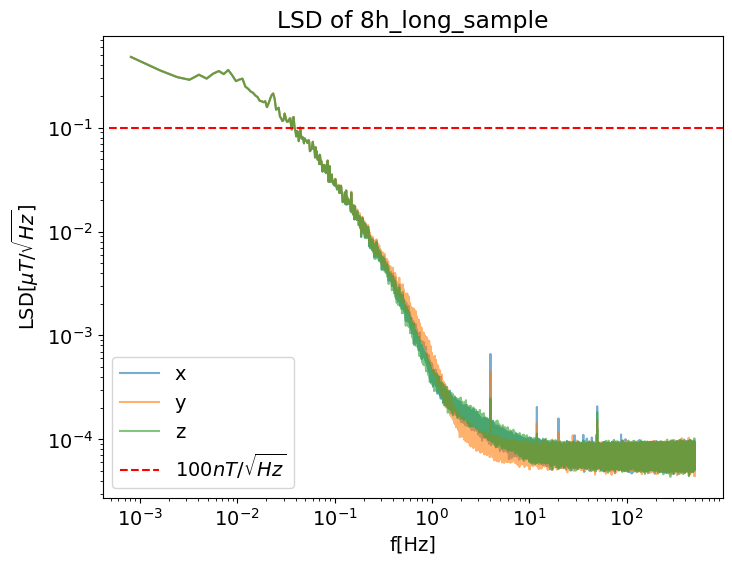

In [38]:
filepath = '20250612_10h/mag_2025_06_13_08_55.csv'
fs = 1000.
samplename = '8h_long_sample'


fig,ax = plot_sample_ps(filepath,fs=fs)
ax.legend(loc='lower left')
ax.set_title('FFT Amplitude of '+ samplename)
fig.savefig('20250612_10h/long_acq_pspsd/power_spectrum/'+samplename+'_ps.png',dpi=200)
fig,ax = plot_sample_psd(filepath,fs=fs)
ax.set_title('LSD of '+ samplename)
ax.axhline(0.1,1e-2,0.5e3,label = r'$100nT/\sqrt{Hz}$',linestyle='--',c='r')
ax.legend(loc='lower left')
fig.savefig('20250612_10h/long_acq_pspsd/spectral_power_density/'+samplename+'_psd.png',dpi=200)

In [ ]:
filepath = '20250612_10h/mag_2025_06_13_15_59.csv'
fs = 1000.
samplename = '20h_long_sample'


fig,ax = plot_sample_ps(filepath,fs=fs)
ax.legend(loc='lower left')
ax.set_title('FFT Amplitude of '+ samplename)
fig.savefig('20250612_10h/long_acq_pspsd/power_spectrum/'+samplename+'_ps.png',dpi=200)
fig,ax = plot_sample_psd(filepath,fs=fs)
ax.set_title('LSD of '+ samplename)
ax.axhline(0.1,1e-2,0.5e3,label = r'$100nT/\sqrt{Hz}$',linestyle='--',c='r')
ax.legend(loc='lower left')
fig.savefig('20250612_10h/long_acq_pspsd/spectral_power_density/'+samplename+'_psd.png',dpi=200)

->plotting direction x